In [95]:
#importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [96]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'Heart Disease Prediction.ipynb', 'heart.csv']


# Load the dataset

In [97]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [98]:
#checking the number of rows and columns
df.shape

(303, 14)

In [99]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [100]:
#statistical representation of data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [101]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [102]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [103]:
target = df[df['target'] == 1]
print(f"Total target is {target.shape}")

not_target = df[df['target'] == 0]
print(f"Not target: {not_target.shape}")

Total target is (165, 14)
Not target: (138, 14)


# Pre-Processing

In [104]:
#checking if there is any null values or ot
df.isnull().any().sum()

0

In [105]:
#checking if there is any duplicates value or not
df.duplicated().sum()

1

In [106]:
#dropping the duplicates values
df.drop_duplicates(inplace = True) #Inplace = True to change the dataset permanently

In [107]:
#after dropping the duplicates value let's check again
df.duplicated().sum()
#we successfully drop the duplicates value

0

In [108]:
# Let's understand the columns

In [109]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [110]:
#Analying the target variable
df['target'].describe()

count    302.000000
mean       0.543046
std        0.498970
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [111]:
df['target'].unique()

array([1, 0], dtype=int64)

# Clearly, this is a classification problem, with the target variable having values '0' and '1'

Checking correlation between columns

In [112]:
print(df.corr()['target'].abs().sort_values(ascending = False))

target      1.000000
exang       0.435601
cp          0.432080
oldpeak     0.429146
thalach     0.419955
ca          0.408992
slope       0.343940
thal        0.343101
sex         0.283609
age         0.221476
trestbps    0.146269
restecg     0.134874
chol        0.081437
fbs         0.026826
Name: target, dtype: float64


Some of the columns are moderately correlated to the target, but fbs is weakly correlated

# EDA

<AxesSubplot:xlabel='target', ylabel='count'>

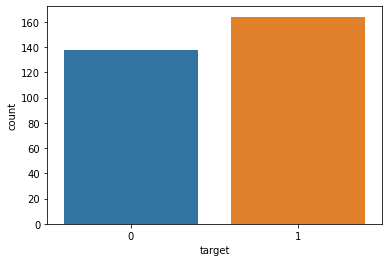

In [113]:
#First, analysing the target variable
sns.countplot(df['target'])

In [114]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.13


# We analyze 'sex','cp','fbs','restecg','exang','slope','ca' and 'thal' features

In [115]:
#Analyzing the 'Sex' feature

In [116]:
df['sex'].unique()

array([1, 0], dtype=int64)

In [117]:
#We notice, that as expected, the 'sex' feature has 2 unique features

<AxesSubplot:xlabel='sex', ylabel='target'>

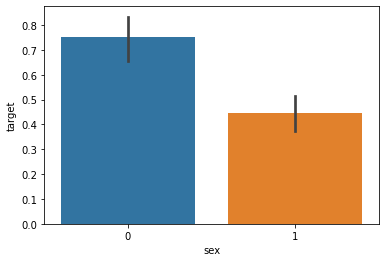

In [150]:
sns.barplot(df['sex'], df['target'])

In [119]:
#Analysing the 'Chest Pain Type' feature

In [120]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='cp', ylabel='target'>

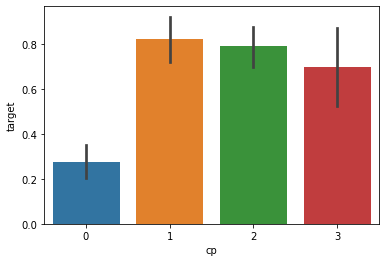

In [151]:
sns.barplot(df['cp'], df['target'])

In [122]:
#We notice, that chest pain of '0', i.e the ones
#with typical angina are much less likey to have heart problems.

In [123]:
df['fbs'].describe()

count    302.000000
mean       0.149007
std        0.356686
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [124]:
df['fbs'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='fbs', ylabel='target'>

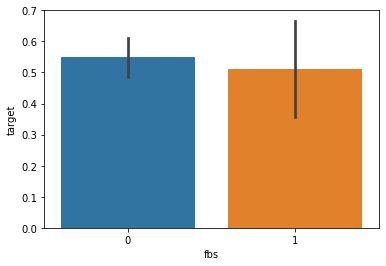

In [152]:
sns.barplot(df['fbs'], df['target'])

In [126]:
df['restecg'].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='target'>

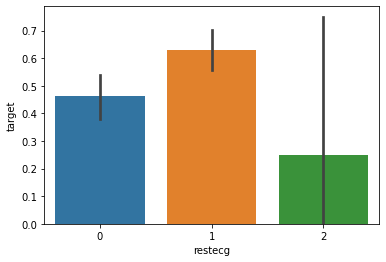

In [153]:
sns.barplot(df['restecg'], df['target'])

In [128]:
#We realize that people with restecg '1' and '0' are much more likey to have
#heart disease than with restecg '2'

In [129]:
df['exang'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exang', ylabel='target'>

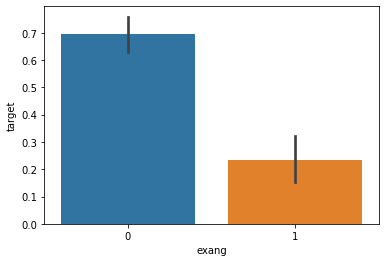

In [154]:
sns.barplot(df['exang'], df['target'])

In [131]:
#People with exang = 1 i.e Exercise included angina are much less likey to 
#have heart problmes

In [132]:
df['slope'].unique()

array([0, 2, 1], dtype=int64)

<AxesSubplot:xlabel='slope', ylabel='target'>

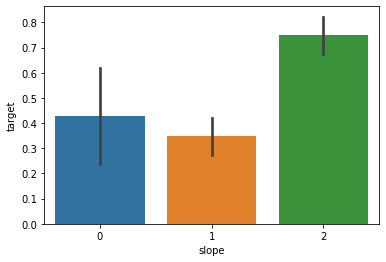

In [155]:
sns.barplot(df['slope'], df['target'])

In [134]:
#We observe, that Slope '2' causes heart pain much more than slope '0' and '1'

In [135]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='count'>

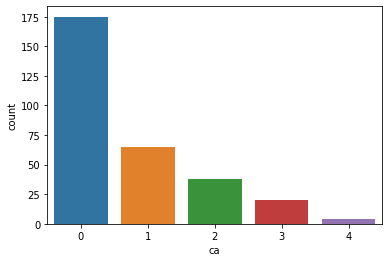

In [136]:
sns.countplot(df['ca'])

<AxesSubplot:xlabel='ca', ylabel='target'>

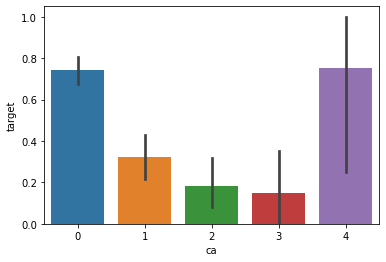

In [156]:
sns.barplot(df['ca'], df['target'])

In [138]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

<AxesSubplot:xlabel='thal', ylabel='target'>

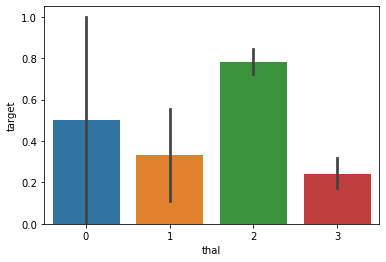

In [157]:
sns.barplot(df['thal'], df['target'])

<AxesSubplot:xlabel='thal', ylabel='Density'>

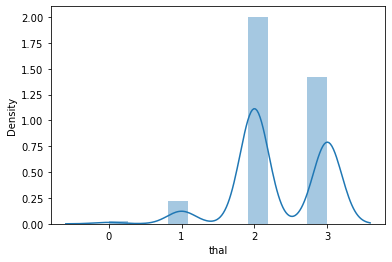

In [158]:
sns.distplot(df['thal'])

# Split the data

In [141]:
from sklearn.model_selection import train_test_split

inputs = df.drop('target', axis = 1)
target = df['target']

In [159]:
inputs.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [160]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [161]:
X_train,X_test,Y_train,Y_test = train_test_split(inputs, target, test_size = 0.2, random_state = 0)

In [162]:
from sklearn.metrics import accuracy_score

# Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [163]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [164]:
y_pred = lr.predict(X_test)

In [165]:
y_pred.shape

(61,)

In [166]:
score_lr = round(accuracy_score(y_pred,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


# Naive Bayes

In [167]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, Y_train)
y_pred_nb = nb.predict(X_test)

In [168]:
y_pred_nb.shape

(61,)

In [169]:
score_nb = round(accuracy_score(y_pred_nb, Y_test) * 100, 2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb) +" %")

The accuracy score achieved using Naive Bayes is: 90.16 %


# SVM

In [171]:
from sklearn import svm
sv = svm.SVC(kernel = "linear")
sv.fit(X_train, Y_train)
y_pred_svm = sv.predict(X_test)

In [172]:
y_pred_svm.shape

(61,)

In [173]:
score_svm = round(accuracy_score(y_pred_svm, Y_test) * 100, 2)

In [174]:
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+ " %")

The accuracy score achieved using Linear SVM is: 86.89 %


# Neural Network

In [176]:
from keras.models import Sequential
from keras.layers import Dense

In [177]:
model = Sequential()
model.add(Dense(11, activation = "relu", input_dim = 13))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [178]:
model.fit(X_train, Y_train, epochs = 300)

Epoch 1/300
8/8 [==============================] - 1s 2ms/step - loss: 50.4970 - accuracy: 0.5394
Epoch 2/300
8/8 [==============================] - 0s 2ms/step - loss: 44.9983 - accuracy: 0.5394
Epoch 3/300
8/8 [==============================] - 0s 2ms/step - loss: 39.8146 - accuracy: 0.5394
Epoch 4/300
8/8 [==============================] - 0s 2ms/step - loss: 34.9718 - accuracy: 0.5394
Epoch 5/300
8/8 [==============================] - 0s 2ms/step - loss: 30.3190 - accuracy: 0.5394
Epoch 6/300
8/8 [==============================] - 0s 2ms/step - loss: 25.8763 - accuracy: 0.5394
Epoch 7/300
8/8 [==============================] - 0s 2ms/step - loss: 21.3743 - accuracy: 0.5394
Epoch 8/300
8/8 [==============================] - 0s 2ms/step - loss: 17.1562 - accuracy: 0.5394
Epoch 9/300
8/8 [==============================] - 0s 1ms/step - loss: 12.9825 - accuracy: 0.5394
Epoch 10/300
8/8 [==============================] - 0s 1ms/step - loss: 8.5392 - accuracy: 0.5394
Epoch 11/300
8/8 [==

8/8 [==============================] - 0s 2ms/step - loss: 0.5429 - accuracy: 0.7469
Epoch 85/300
8/8 [==============================] - 0s 2ms/step - loss: 0.5400 - accuracy: 0.7552
Epoch 86/300
8/8 [==============================] - 0s 2ms/step - loss: 0.5389 - accuracy: 0.7593
Epoch 87/300
8/8 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.7510
Epoch 88/300
8/8 [==============================] - 0s 2ms/step - loss: 0.5324 - accuracy: 0.7510
Epoch 89/300
8/8 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7510
Epoch 90/300
8/8 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.7593
Epoch 91/300
8/8 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7552
Epoch 92/300
8/8 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.7552
Epoch 93/300
8/8 [==============================] - 0s 2ms/step - loss: 0.5166 - accuracy: 0.7676
Epoch 94/300
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8216
Epoch 168/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.8133
Epoch 169/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.8091
Epoch 170/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.8133
Epoch 171/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.8050
Epoch 172/300
8/8 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8174
Epoch 173/300
8/8 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8008
Epoch 174/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.8050
Epoch 175/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.8133
Epoch 176/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8174
Epoch 177/300
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.7884
Epoch 250/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8133
Epoch 251/300
8/8 [==============================] - ETA: 0s - loss: 0.3808 - accuracy: 0.78 - 0s 2ms/step - loss: 0.3948 - accuracy: 0.8091
Epoch 252/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.7967
Epoch 253/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8050
Epoch 254/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8382
Epoch 255/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8423
Epoch 256/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8382
Epoch 257/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3812 - accuracy: 0.8382
Epoch 258/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3849 -

In [179]:
Y_pred_nn = model.predict(X_test)

In [180]:
Y_pred_nn.shape

(61, 1)

In [181]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [182]:

score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 88.52 %


In [183]:

scores = [score_lr,score_nb,score_svm,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 90.16 %
The accuracy score achieved using Support Vector Machine is: 86.89 %
The accuracy score achieved using Neural Network is: 88.52 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

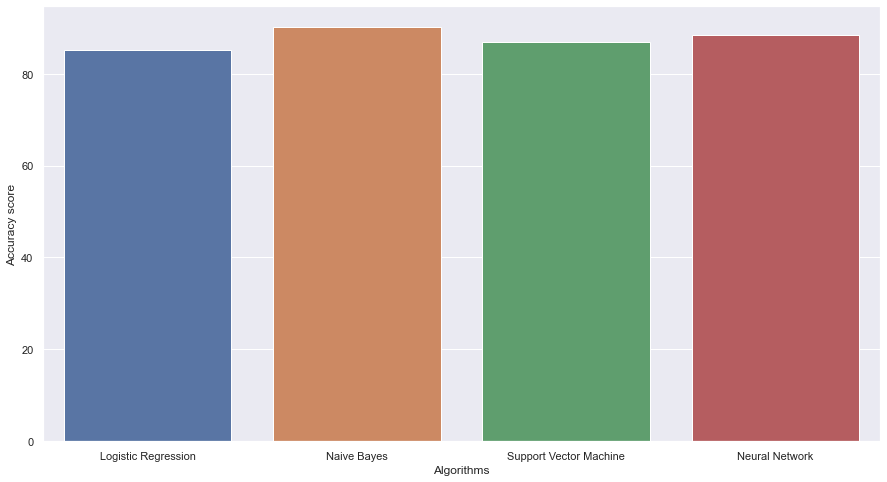

In [184]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

   Naive Bayes forest has good result as compare to other algorithms